<a href="https://colab.research.google.com/github/ManelSoengas/DL_Task1/blob/main/DL_BERT_task1_es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="blue"><h1>**DEEP LEARNING**</h1></font>


---
BERT es un modelo de lenguaje basado en transformers que utiliza una arquitectura de red neuronal llamada Transformer para aprender representaciones de palabras y oraciones en un corpus de texto.

Teniendo en cuenta la estructura y volumen de los datos se proponen diversos enfoques :


1.   Aplicar **Dropout** y **early stopping** para evitar la situación de **overfitting**.
2.   Aumentar los datos mediante técnicas de **data augmentation**.

In [1]:
# Cargar las librerias y recursos necesarios.

import pandas as pd
from sklearn.model_selection import train_test_split
!pip install transformers
from transformers import BertTokenizer, TFBertForSequenceClassification

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.8 MB/s eta 0:00:00


In [5]:
from sklearn.utils import shuffle
# Cargar datos preprocesados
#train_data = pd.read_csv('/content/df_train_en_to_es.csv', delimiter='\t', encoding='latin1')
#test_data = pd.read_csv('/content/df_test_en_to_es.csv', delimiter='\t', encoding='latin1')

test_data = pd.read_csv('/content/data_test_es.tsv', sep='\t')
train_data = pd.read_csv('/content/data_train_es.tsv', sep='\t')
# Mezclar los datos de entrenamiento
shuffled_train_data = shuffle(train_data, random_state=42)

# Mezclar los datos de prueba
shuffled_test_data = shuffle(test_data, random_state=42)

In [7]:
test_data.head(10)

,test_case,id,source,language,task1,task2,texto
0,EXIST2021,6978,gab,es,non-sexist,non-sexist,El representante del estado de Pensilvania se ...
1,EXIST2021,6979,twitter,es,non-sexist,non-sexist,usuario suena como un culo y muy condescendiente
2,EXIST2021,6980,twitter,es,sexist,ideological-inequality,user user jajaja este comportamiento de no dej...
3,EXIST2021,6981,twitter,es,sexist,ideological-inequality,"usuario derechos de usuario quiero decir, sí, ..."
4,EXIST2021,6982,twitter,es,non-sexist,non-sexist,la apreciación múltiple de jack que estoy vien...
5,EXIST2021,6983,gab,es,non-sexist,non-sexist,"usuario, ¿por qué este personaje ya no está to..."
6,EXIST2021,6984,twitter,es,non-sexist,non-sexist,"usuario, no puedo evitar torturarme leyendo es..."
7,EXIST2021,6985,twitter,es,sexist,ideological-inequality,usuario usuario usuario dejen de considerar a ...
8,EXIST2021,6986,gab,es,sexist,objectification,"Sí, es duro, pero no para las mujeres. Las muj..."
9,EXIST2021,6987,gab,es,non-sexist,non-sexist,aunque la negación cristiana no se enfatiza en...


In [8]:
shuffled_train_data.head(10)

,test_case,id,source,language,task1,task2,texto
5286,EXIST2021,5287,twitter,es,sexist,stereotyping-dominance,user user no es que no de ni una es que e...
6018,EXIST2021,6019,twitter,es,non-sexist,non-sexist,user user user si los tiene locos a ellos y...
2981,EXIST2021,2982,twitter,es,non-sexist,non-sexist,usuario Me recogieron en algún lugar hace años...
3347,EXIST2021,3348,twitter,es,sexist,sexual-violence,"usuario, mi deseo navideño es que tomes mi pol..."
469,EXIST2021,470,twitter,es,sexist,stereotyping-dominance,entre las conversaciones que fusionan la domes...
538,EXIST2021,539,twitter,es,non-sexist,non-sexist,usuario dejarás de ser un idiota por un día mi...
3176,EXIST2021,3177,twitter,es,non-sexist,non-sexist,"en cualquier momento dado, la igualdad perfect..."
6127,EXIST2021,6128,twitter,es,sexist,misogyny-non-sexual-violence,user esa parte es la mejor poner en su lugar a...
1047,EXIST2021,1048,twitter,es,sexist,sexual-violence,usuario usuario imagine a una mujer siendo dom...
1330,EXIST2021,1331,twitter,es,sexist,ideological-inequality,Las usuarias que tienen un pie en el cristiani...


<font color="brown"><h1>**Preprocesamiento**</h1></font>



In [ ]:
import re

def anonimize_text(text):
    # Anonimizar nombres de usuario
    text = re.sub(r'@[\w_]+', '@user', text)

    # Anonimizar hashtags
    text = re.sub(r'#\w+', '#hashtag', text)

    # Anonimizar enlaces
    text = re.sub(r'https?://\S+', 'link', text)

    return text

shuffled_train_data['text_anonymized'] = shuffled_train_data['text'].apply(anonimize_text)
shuffled_test_data['text_anonymized'] = shuffled_test_data['text'].apply(anonimize_text)

In [9]:
# Convertir a minúsculas

shuffled_train_data.text_anonymized = shuffled_train_data.text_anonymized.str.lower()
shuffled_train_data.head(10)
shuffled_test_data.text_anonymized = shuffled_test_data.text_anonymized.str.lower()
shuffled_test_data.head(10)

AttributeError: ignored

In [10]:
shuffled_train_data.texto = shuffled_train_data.texto.str.lower()
shuffled_train_data.head(10)
shuffled_test_data.texto = shuffled_test_data.texto.str.lower()
shuffled_test_data.head(10)

,test_case,id,source,language,task1,task2,texto
2057,EXIST2021,9035,twitter,es,sexist,ideological-inequality,usted debe estar hablando de ellos feminazi s ...
1094,EXIST2021,8072,gab,es,sexist,sexual-violence,un gran punto hecho por la persona que llamó a...
1472,EXIST2021,8450,twitter,es,sexist,sexual-violence,no se puede agarrar a una mujer por el coño si...
430,EXIST2021,7408,twitter,es,sexist,stereotyping-dominance,"¿qué obtiene la gente de la crueldad, malignid..."
949,EXIST2021,7927,twitter,es,sexist,sexual-violence,el último chico con el que salí a menudo menci...
1410,EXIST2021,8388,twitter,es,sexist,ideological-inequality,"user user bien, acordaron sacarlo de la estrat..."
756,EXIST2021,7734,twitter,es,non-sexist,non-sexist,perra no se porque se esta traduciendo a pito
408,EXIST2021,7386,gab,es,sexist,ideological-inequality,por que se considera misoginia odiar el femini...
1897,EXIST2021,8875,twitter,es,non-sexist,non-sexist,estoy viendo ese debate progresista y conserva...
2170,EXIST2021,9148,gab,es,non-sexist,non-sexist,colin kaepernik no es más que una puta de aten...


In [ ]:
# Eliminar url/website que no usan http, solo utilizan .com websites
# Palabras separadas por a . no son eliminadas

shuffled_train_data.text_anonymized = shuffled_train_data.text_anonymized.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
shuffled_train_data.head(10)
shuffled_test_data.text_anonymized = shuffled_test_data.text_anonymized.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
shuffled_test_data.head(10)

,test_case,id,source,language,text,task1,task2,text_anonymized
1374,EXIST2021,8352,twitter,en,"if i ever catch anyone beating a women, i swea...",non-sexist,non-sexist,"if i ever catch anyone beating a women, i swea..."
2293,EXIST2021,9271,twitter,es,"""No sé si habrá un #MeToo del cine español. Cu...",non-sexist,non-sexist,"""no sé si habrá un #hashtag del cine español. ..."
3379,EXIST2021,10357,twitter,es,En el dia de hoy se sostuvo reunión con Claudi...,non-sexist,non-sexist,en el dia de hoy se sostuvo reunión con claudi...
1090,EXIST2021,8068,twitter,en,Man I love a good podcast. I highly recommend ...,non-sexist,non-sexist,man i love a good podcast. i highly recommend ...
1803,EXIST2021,8781,twitter,en,#BidenErasedWomen#BidenAintSmart#RealWomenMatt...,sexist,ideological-inequality,#hashtag#hashtag#hashtag not transgender!.#has...
2694,EXIST2021,9672,twitter,es,"tw/ transfobia ""no es opresión"" -hombres desle...",sexist,ideological-inequality,"tw/ transfobia ""no es opresión"" -hombres desle..."
461,EXIST2021,7439,twitter,en,@not_corona_ maybe its repressed antiblackness .,non-sexist,non-sexist,@user maybe its repressed antiblackness .
3346,EXIST2021,10324,twitter,es,@dara_ordonez ya nada es igual que cuando las ...,sexist,misogyny-non-sexual-violence,@user ya nada es igual que cuando las putas y ...
2297,EXIST2021,9275,twitter,es,"@modadulce Estoy de acuerdo, me parece que ten...",non-sexist,non-sexist,"@user estoy de acuerdo, me parece que tenemos ..."
2873,EXIST2021,9851,twitter,es,#BCSinAdicciones| FAIMUDEl día de hoy realizam...,non-sexist,non-sexist,#hashtag| faimudel día de hoy realizamos una m...


In [12]:
import re
shuffled_train_data.texto = shuffled_train_data.texto.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
shuffled_train_data.head(10)
shuffled_test_data.texto = shuffled_test_data.texto.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
shuffled_test_data.head(10)

,test_case,id,source,language,task1,task2,texto
2057,EXIST2021,9035,twitter,es,sexist,ideological-inequality,usted debe estar hablando de ellos feminazi s ...
1094,EXIST2021,8072,gab,es,sexist,sexual-violence,un gran punto hecho por la persona que llamó a...
1472,EXIST2021,8450,twitter,es,sexist,sexual-violence,no se puede agarrar a una mujer por el coño si...
430,EXIST2021,7408,twitter,es,sexist,stereotyping-dominance,"¿qué obtiene la gente de la crueldad, malignid..."
949,EXIST2021,7927,twitter,es,sexist,sexual-violence,el último chico con el que salí a menudo menci...
1410,EXIST2021,8388,twitter,es,sexist,ideological-inequality,"user user bien, acordaron sacarlo de la estrat..."
756,EXIST2021,7734,twitter,es,non-sexist,non-sexist,perra no se porque se esta traduciendo a pito
408,EXIST2021,7386,gab,es,sexist,ideological-inequality,por que se considera misoginia odiar el femini...
1897,EXIST2021,8875,twitter,es,non-sexist,non-sexist,estoy viendo ese debate progresista y conserva...
2170,EXIST2021,9148,gab,es,non-sexist,non-sexist,colin kaepernik no es más que una puta de aten...


In [ ]:
# Expnadir las contracciones en inglés
!pip install contractions
import contractions


# Definir la función de expansión de contracciones
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

# Aplicar la expansión de contracciones a la columna 'text' del DataFrame
shuffled_train_data['text_anonymized'] = shuffled_train_data['text_anonymized'].apply(expand_contractions)
shuffled_train_data.head(10)
shuffled_test_data['text_anonymized'] = shuffled_test_data['text_anonymized'].apply(expand_contractions)
shuffled_test_data.head(10)

,test_case,id,source,language,text,task1,task2,text_anonymized
1374,EXIST2021,8352,twitter,en,"if i ever catch anyone beating a women, i swea...",non-sexist,non-sexist,"if i ever catch anyone beating a women, i swea..."
2293,EXIST2021,9271,twitter,es,"""No sé si habrá un #MeToo del cine español. Cu...",non-sexist,non-sexist,"""no sé si habrá un #hashtag del cine españold...."
3379,EXIST2021,10357,twitter,es,En el dia de hoy se sostuvo reunión con Claudi...,non-sexist,non-sexist,en el dia de hoy se sostuvo reunión con claudi...
1090,EXIST2021,8068,twitter,en,Man I love a good podcast. I highly recommend ...,non-sexist,non-sexist,man i love a good podcast. i highly recommend ...
1803,EXIST2021,8781,twitter,en,#BidenErasedWomen#BidenAintSmart#RealWomenMatt...,sexist,ideological-inequality,#hashtag#hashtag#hashtag not transgender!.#has...
2694,EXIST2021,9672,twitter,es,"tw/ transfobia ""no es opresión"" -hombres desle...",sexist,ideological-inequality,"tw/ transfobia ""no es opresión"" -hombres desle..."
461,EXIST2021,7439,twitter,en,@not_corona_ maybe its repressed antiblackness .,non-sexist,non-sexist,@user maybe its repressed antiblackness .
3346,EXIST2021,10324,twitter,es,@dara_ordonez ya nada es igual que cuando las ...,sexist,misogyny-non-sexual-violence,@user ya nada es igual que cuando las putas y ...
2297,EXIST2021,9275,twitter,es,"@modadulce Estoy de acuerdo, me parece que ten...",non-sexist,non-sexist,"@user estoy de acuerdo, me parece que tenemos ..."
2873,EXIST2021,9851,twitter,es,#BCSinAdicciones| FAIMUDEl día de hoy realizam...,non-sexist,non-sexist,#hashtag| faimudel día de hoy realizamos una m...


In [ ]:
# Eliminar &text; etiquetas html

shuffled_train_data.text_anonymized = shuffled_train_data.text_anonymized.apply(lambda x: re.sub(r'&[a-zñ]+;', '', x))
shuffled_train_data.iloc[4000:4010]
shuffled_test_data.text_anonymized = shuffled_test_data.text_anonymized.apply(lambda x: re.sub(r'&[a-zñ]+;', '', x))
shuffled_test_data.iloc[4000:4010]

,test_case,id,source,language,text,task1,task2,text_anonymized
4232,EXIST2021,11210,twitter,es,@DrManuelGarcia Jajaja de 100// 90 pero por de...,sexist,stereotyping-dominance,@user jajaja de 100// 90 pero por desgracia si...
116,EXIST2021,7094,twitter,en,@s00m3u get your fancam out of the tomasito ha...,sexist,misogyny-non-sexual-violence,@user get your fancam out of the tomasito hash...
3545,EXIST2021,10523,twitter,es,@Luis_Delia Cuánta mierda y escoria kiechneris...,non-sexist,non-sexist,@user cuánta mierda y escoria kiechnerista ......
740,EXIST2021,7718,gab,en,Lying falase victim democrat agent Joy Villa w...,sexist,ideological-inequality,lying falase victim democrat agent joy villa w...
4199,EXIST2021,11177,twitter,es,@HStylesSP @Harry_Styles Empoderamiento con es...,non-sexist,non-sexist,@user @user empoderamiento con esta cancioooon...
1974,EXIST2021,8952,gab,en,.......who do you think put that meme of #mans...,sexist,misogyny-non-sexual-violence,.......who do you think put that meme of #hash...
1081,EXIST2021,8059,twitter,en,Isaias Afewerki &amp; @AbiyAhmedAli both lied ...,non-sexist,non-sexist,isaias afewerki @user both lied about eritrea...
3675,EXIST2021,10653,gab,es,Coletas mandado callar a la feminazi,sexist,ideological-inequality,coletas mandado callar a la feminazi
1810,EXIST2021,8788,twitter,en,@YourQueenBri1 @BearsgetWATSON @teddy420180 @A...,sexist,misogyny-non-sexual-violence,@user @user @user @user since when was it okay...
830,EXIST2021,7808,gab,en,"Yeah, here you come knockin' on my door, baby ...",sexist,objectification,"yeah, here you come knockin' on my door, baby ..."


In [14]:
shuffled_train_data.texto = shuffled_train_data.texto.apply(lambda x: re.sub(r'&[a-zñ]+;', '', x))
shuffled_train_data.head()
shuffled_test_data.texto = shuffled_test_data.texto.apply(lambda x: re.sub(r'&[a-zñ]+;', '', x))
shuffled_test_data.head()

,test_case,id,source,language,task1,task2,texto
2057,EXIST2021,9035,twitter,es,sexist,ideological-inequality,usted debe estar hablando de ellos feminazi s ...
1094,EXIST2021,8072,gab,es,sexist,sexual-violence,un gran punto hecho por la persona que llamó a...
1472,EXIST2021,8450,twitter,es,sexist,sexual-violence,no se puede agarrar a una mujer por el coño si...
430,EXIST2021,7408,twitter,es,sexist,stereotyping-dominance,"¿qué obtiene la gente de la crueldad, malignid..."
949,EXIST2021,7927,twitter,es,sexist,sexual-violence,el último chico con el que salí a menudo menci...


In [ ]:
# Eliminar caráctres especiales, #:)(/\='] usados en emojis y hashtags

shuffled_train_data.text_anonymized = shuffled_train_data.text_anonymized.str.replace("[^a-zA-ZñÑ#]", " ")
shuffled_train_data.head(10)
shuffled_test_data.text_anonymized = shuffled_test_data.text_anonymized.str.replace("[^a-zA-ZñÑ#]", " ")
shuffled_test_data.head(10)

<ipython-input-61-2f10188dda66>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  shuffled_train_data.text_anonymized = shuffled_train_data.text_anonymized.str.replace("[^a-zA-ZñÑ#]", " ")
<ipython-input-61-2f10188dda66>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  shuffled_test_data.text_anonymized = shuffled_test_data.text_anonymized.str.replace("[^a-zA-ZñÑ#]", " ")


,test_case,id,source,language,text,task1,task2,text_anonymized
1374,EXIST2021,8352,twitter,en,"if i ever catch anyone beating a women, i swea...",non-sexist,non-sexist,if i ever catch anyone beating a women i swea...
2293,EXIST2021,9271,twitter,es,"""No sé si habrá un #MeToo del cine español. Cu...",non-sexist,non-sexist,no s si habr un #hashtag del cine españold ...
3379,EXIST2021,10357,twitter,es,En el dia de hoy se sostuvo reunión con Claudi...,non-sexist,non-sexist,en el dia de hoy se sostuvo reuni n con claudi...
1090,EXIST2021,8068,twitter,en,Man I love a good podcast. I highly recommend ...,non-sexist,non-sexist,man i love a good podcast i highly recommend ...
1803,EXIST2021,8781,twitter,en,#BidenErasedWomen#BidenAintSmart#RealWomenMatt...,sexist,ideological-inequality,#hashtag#hashtag#hashtag not transgender #has...
2694,EXIST2021,9672,twitter,es,"tw/ transfobia ""no es opresión"" -hombres desle...",sexist,ideological-inequality,tw transfobia no es opresi n hombres desle...
461,EXIST2021,7439,twitter,en,@not_corona_ maybe its repressed antiblackness .,non-sexist,non-sexist,user maybe its repressed antiblackness
3346,EXIST2021,10324,twitter,es,@dara_ordonez ya nada es igual que cuando las ...,sexist,misogyny-non-sexual-violence,user ya nada es igual que cuando las putas y ...
2297,EXIST2021,9275,twitter,es,"@modadulce Estoy de acuerdo, me parece que ten...",non-sexist,non-sexist,user estoy de acuerdo me parece que tenemos ...
2873,EXIST2021,9851,twitter,es,#BCSinAdicciones| FAIMUDEl día de hoy realizam...,non-sexist,non-sexist,#hashtag faimudel d a de hoy realizamos una m...


In [15]:
shuffled_train_data.texto = shuffled_train_data.texto.str.replace("[^a-zA-ZñÑ#]", " ")
shuffled_train_data.head(10)
shuffled_test_data.texto = shuffled_test_data.texto.str.replace("[^a-zA-ZñÑ#]", " ")
shuffled_test_data.head(10)

<ipython-input-15-b81757d27289>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  shuffled_train_data.texto = shuffled_train_data.texto.str.replace("[^a-zA-ZñÑ#]", " ")
<ipython-input-15-b81757d27289>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  shuffled_test_data.texto = shuffled_test_data.texto.str.replace("[^a-zA-ZñÑ#]", " ")


,test_case,id,source,language,task1,task2,texto
2057,EXIST2021,9035,twitter,es,sexist,ideological-inequality,usted debe estar hablando de ellos feminazi s ...
1094,EXIST2021,8072,gab,es,sexist,sexual-violence,un gran punto hecho por la persona que llam a...
1472,EXIST2021,8450,twitter,es,sexist,sexual-violence,no se puede agarrar a una mujer por el coño si...
430,EXIST2021,7408,twitter,es,sexist,stereotyping-dominance,qu obtiene la gente de la crueldad malignid...
949,EXIST2021,7927,twitter,es,sexist,sexual-violence,el ltimo chico con el que sal a menudo menci...
1410,EXIST2021,8388,twitter,es,sexist,ideological-inequality,user user bien acordaron sacarlo de la estrat...
756,EXIST2021,7734,twitter,es,non-sexist,non-sexist,perra no se porque se esta traduciendo a pito
408,EXIST2021,7386,gab,es,sexist,ideological-inequality,por que se considera misoginia odiar el femini...
1897,EXIST2021,8875,twitter,es,non-sexist,non-sexist,estoy viendo ese debate progresista y conserva...
2170,EXIST2021,9148,gab,es,non-sexist,non-sexist,colin kaepernik no es m s que una puta de aten...


In [18]:
import pandas as pd

# Suponiendo que ya tienes cargado el DataFrame en la variable "df"
# Por ejemplo, si tienes el DataFrame "test_data" que mencionaste antes:
# test_data = pd.read_csv('/content/df_test_en_to_es.csv', sep='\t')

# Obtener la longitud del DataFrame (número de filas)
longitud = shuffled_test_data.shape[0]

# Mostrar la longitud
print("La longitud del DataFrame es:", longitud)


La longitud del DataFrame es: 2208


In [ ]:
# Eliminar la columna 'text'
shuffled_train_data.drop('text', axis=1, inplace=True)
shuffled_test_data.drop('text', axis=1, inplace=True)
# Renombrar la columna 'text_anonimized' como 'text'
shuffled_train_data.rename(columns={'text_anonymized': 'text'}, inplace=True)
shuffled_train_data.iloc[4000:4010]
shuffled_test_data.rename(columns={'text_anonymized': 'text'}, inplace=True)
shuffled_test_data.iloc[4000:4010]

,test_case,id,source,language,task1,task2,text
4232,EXIST2021,11210,twitter,es,sexist,stereotyping-dominance,user jajaja de pero por desgracia si...
116,EXIST2021,7094,twitter,en,sexist,misogyny-non-sexual-violence,user get your fancam out of the tomasito hash...
3545,EXIST2021,10523,twitter,es,non-sexist,non-sexist,user cu nta mierda y escoria kiechnerista ...
740,EXIST2021,7718,gab,en,sexist,ideological-inequality,lying falase victim democrat agent joy villa w...
4199,EXIST2021,11177,twitter,es,non-sexist,non-sexist,user user empoderamiento con esta cancioooon...
1974,EXIST2021,8952,gab,en,sexist,misogyny-non-sexual-violence,who do you think put that meme of #hash...
1081,EXIST2021,8059,twitter,en,non-sexist,non-sexist,isaias afewerki user both lied about eritrea...
3675,EXIST2021,10653,gab,es,sexist,ideological-inequality,coletas mandado callar a la feminazi
1810,EXIST2021,8788,twitter,en,sexist,misogyny-non-sexual-violence,user user user user since when was it okay...
830,EXIST2021,7808,gab,en,sexist,objectification,yeah here you come knockin on my door baby ...


<font color="brown"><h1>**Carga de los recursos del algoritmo BERT**</h1></font>

1.   Tokenizador.
2.   Modelo pre-entrenado.

In [19]:
# Cargar el tokenizador de BERT
#tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', vocab_size=30522)
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')


# Cargar el modelo BERT pre-entrenado
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<font color="brown"><h1>**Longitud máxima por sentencia**</h1></font>

Valor relacionado con los recursos de máquina.

In [20]:
MAX_LEN=255

In [ ]:
import numpy as np

shuffled_test_data['text'] = shuffled_test_data['text'].fillna('')  # Rellenar los valores perdidos con una cadena vacía

token_lens = []

for txt in shuffled_test_data['text'].values:
    tokens = tokenizer.encode(txt, max_length=5000, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)
print(max_len)

755


In [ ]:
import numpy as np

shuffled_train_data['text'] = shuffled_train_data['text'].fillna('')  # Rellenar los valores perdidos con una cadena vacía

token_lenss = []

for txt in shuffled_train_data['text'].values:
    tokens = tokenizer.encode(txt, max_length=500, truncation=True)
    token_lenss.append(len(tokens))

max_len=np.max(token_lenss)
print(max_len)

134


In [21]:
shuffled_train_data.head(10)

,test_case,id,source,language,task1,task2,texto
5286,EXIST2021,5287,twitter,es,sexist,stereotyping-dominance,user user no es que no de ni una es que e...
6018,EXIST2021,6019,twitter,es,non-sexist,non-sexist,user user user si los tiene locos a ellos y...
2981,EXIST2021,2982,twitter,es,non-sexist,non-sexist,usuario me recogieron en alg n lugar hace años...
3347,EXIST2021,3348,twitter,es,sexist,sexual-violence,usuario mi deseo navideño es que tomes mi pol...
469,EXIST2021,470,twitter,es,sexist,stereotyping-dominance,entre las conversaciones que fusionan la domes...
538,EXIST2021,539,twitter,es,non-sexist,non-sexist,usuario dejar s de ser un idiota por un d a mi...
3176,EXIST2021,3177,twitter,es,non-sexist,non-sexist,en cualquier momento dado la igualdad perfect...
6127,EXIST2021,6128,twitter,es,sexist,misogyny-non-sexual-violence,user esa parte es la mejor poner en su lugar a...
1047,EXIST2021,1048,twitter,es,sexist,sexual-violence,usuario usuario imagine a una mujer siendo dom...
1330,EXIST2021,1331,twitter,es,sexist,ideological-inequality,las usuarias que tienen un pie en el cristiani...


In [ ]:
X = shuffled_train_data['text'].values
y = shuffled_train_data['task1'].values
Z = shuffled_test_data['text'].values
z = shuffled_test_data['task1'].values

In [22]:
X = shuffled_train_data['texto'].values
y = shuffled_train_data['task1'].values
Z = shuffled_test_data['texto'].values
z = shuffled_test_data['task1'].values

In [23]:
# Dividir los datos en entrenamiento y prueba
train_text, val_text, train_task1, val_task1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
import numpy as np
from transformers import BertTokenizer

def tokenize_bert(data, max_len=MAX_LEN):
    tokenizer_bert = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer_bert.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            truncation_strategy='longest_first',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids), np.array(attention_masks)


<font color="brown"><h1>**Codificación**</h1></font>
Codificación en representaciones one-hot de la clase utilizando OneHotEncoder y se obtiene las matrices densas.

In [25]:
#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(train_task1).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(val_task1).reshape(-1, 1)).toarray()
z_test = ohe.fit_transform(np.array(z).reshape(-1, 1)).toarray()

<font color="brown"><h1>**Obtención de los datos**</h1></font>
Para una estructura BERT es necesario obtener :


1.   Tokenizado del conjunto de datos : train, test y val.
2.   Obtención de la máscara de atención para cada conjunto de datos.



In [27]:
train_input_ids, train_attention_masks = tokenize_bert(train_text, MAX_LEN)
val_input_ids, val_attention_masks = tokenize_bert(val_text, MAX_LEN)
test_input_ids, test_attention_masks = tokenize_bert(Z, MAX_LEN)

<font color="brown"><h1>**Estructura de los datos**</h1></font>

In [28]:
print(train_input_ids.shape)
print(val_input_ids.shape)
print(test_input_ids.shape)

(5581, 255)
(1396, 255)
(2208, 255)


<font color="brown"><h1>**Configuración del modelo**</h1></font>

In [33]:
def create_model(bert_model, max_len=MAX_LEN):
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.BinaryCrossentropy()
    accuracy = tf.keras.metrics.BinaryAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')
    output = bert_model([input_ids, attention_masks])
    output = output[1]

    output = tf.keras.layers.BatchNormalization(
    )(output)
    # Agregar Dropout
    output = tf.keras.layers.Dropout(0.5)(output)


    output = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(output)
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

    # Compilar el modelo
    model.compile(opt, loss=loss, metrics=accuracy)

    # Agregar Early Stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')

    return model, early_stopping

In [34]:
bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

<font color="brown"><h1>**Creación del modelo**</h1></font>

In [36]:


#model = create_model(roberta_model, MAX_LEN)
model, early_stopping = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 255)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 255)]        0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  177853440   ['input_5[0][0]',                
                                thPoolingAndCrossAt               'input_6[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 255,                                         

In [37]:
history = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=8, batch_size=16)

Epoch 1/7
349/349 [==============================] - 363s 904ms/step - loss: 0.9991 - binary_accuracy: 0.5515 - val_loss: 0.6553 - val_binary_accuracy: 0.6368
Epoch 2/7
349/349 [==============================] - 313s 896ms/step - loss: 0.9168 - binary_accuracy: 0.5924 - val_loss: 0.6584 - val_binary_accuracy: 0.6877
Epoch 3/7
349/349 [==============================] - 328s 941ms/step - loss: 0.8352 - binary_accuracy: 0.6452 - val_loss: 0.5595 - val_binary_accuracy: 0.7128
Epoch 4/7
349/349 [==============================] - 328s 940ms/step - loss: 0.7663 - binary_accuracy: 0.6717 - val_loss: 0.5520 - val_binary_accuracy: 0.7142
Epoch 5/7
349/349 [==============================] - 328s 940ms/step - loss: 0.6609 - binary_accuracy: 0.7173 - val_loss: 0.6165 - val_binary_accuracy: 0.6648
Epoch 6/7
349/349 [==============================] - 328s 940ms/step - loss: 0.4858 - binary_accuracy: 0.7739 - val_loss: 0.5937 - val_binary_accuracy: 0.7221
Epoch 7/7
349/349 [===========================

In [38]:
result_bert = model.predict([test_input_ids,test_attention_masks])

69/69 [==============================] - 39s 550ms/step


In [39]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [40]:
print('\tClassification Report for BERT:\n\n',classification_report(z_test,y_pred_bert, target_names=['sexist', 'non-sexist']))



	Classification Report for BERT:

               precision    recall  f1-score   support

      sexist       0.72      0.67      0.69      1050
  non-sexist       0.72      0.76      0.74      1158

   micro avg       0.72      0.72      0.72      2208
   macro avg       0.72      0.71      0.71      2208
weighted avg       0.72      0.72      0.72      2208
 samples avg       0.72      0.72      0.72      2208



<font color="brown"><h1>**Evaluación del modelo**</h1></font>

Se obtienen las siguientes gráficas y tablas para obtener una idea de la calidad y evolución del modelo.

1.   Matriz de confusión.
2.   Curvas de evolucción del modelo durante el entrenamiento.



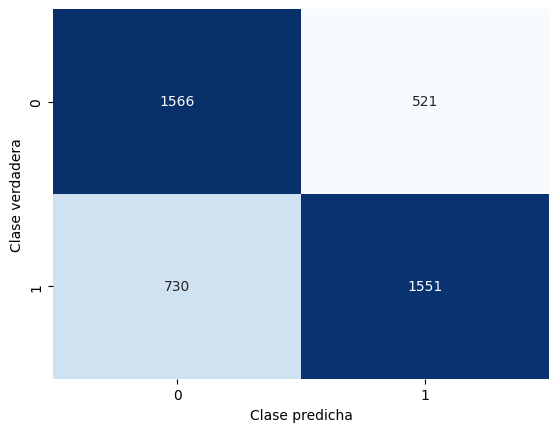

In [ ]:
#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que z_test.argmax(1) son las etiquetas reales y y_pred_roberta.argmax(1) son las etiquetas predichas
cm = confusion_matrix(z_test.argmax(1), y_pred_bert.argmax(1))

# Crear un heatmap de la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Añadir etiquetas a los ejes
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")

# Mostrar el gráfico
plt.show()

Resultados de BERT:
[[8.4768445e-04 9.9915230e-01]
 [9.9983764e-01 1.6234073e-04]
 [9.9980766e-01 1.9238410e-04]
 ...
 [1.0707265e-03 9.9892920e-01]
 [4.4387984e-01 5.5612016e-01]
 [3.4918353e-02 9.6508163e-01]]
Predicciones de BERT:
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


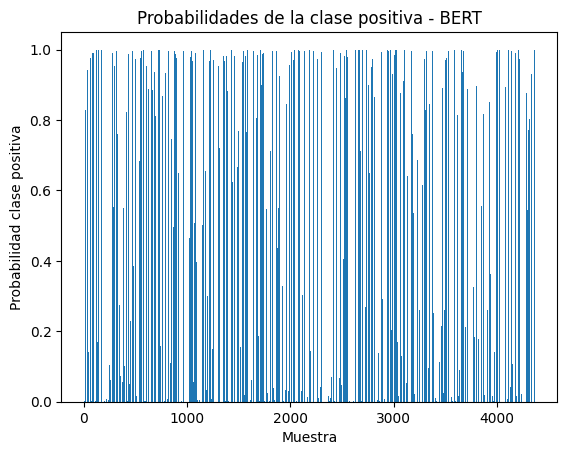

In [ ]:
y_pred_bert = np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

# Imprimir result_bert
print("Resultados de BERT:")
print(result_bert)

# Imprimir y_pred_bert
print("Predicciones de BERT:")
print(y_pred_bert)

# Obtener las probabilidades de la clase positiva (etiqueta 1)
probabilities = result_bert[:, 1]

# Crear índices para las muestras
indices = np.arange(len(probabilities))

# Generar gráfico de barras
plt.bar(indices, probabilities)
plt.xlabel("Muestra")
plt.ylabel("Probabilidad clase positiva")
plt.title("Probabilidades de la clase positiva - BERT")
plt.show()

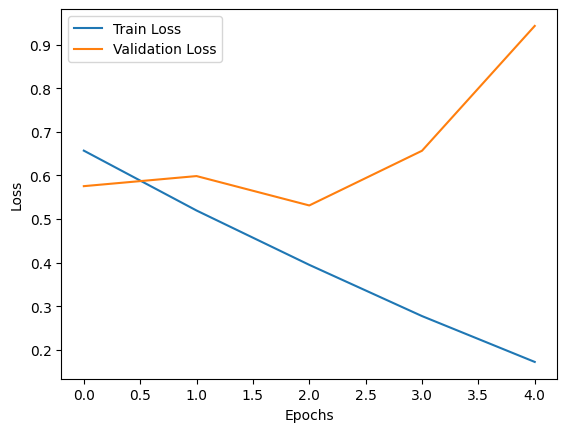

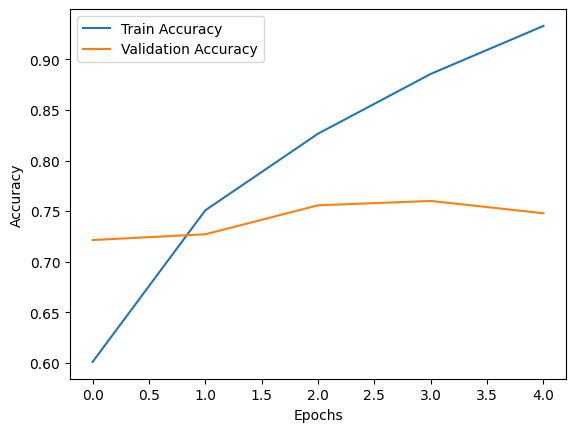

In [ ]:
import matplotlib.pyplot as plt

# Obtener las métricas de entrenamiento y validación del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_binary_accuracy']

# Generar gráfica de pérdida
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generar gráfica de precisión
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<font color="brown"><h1>**Conclusiones**</h1></font>

A la vista de los resultados, observamos que la pérdida de validación aumenta indicando overfitting. Aún habiendo utilizado dropout, el modelo no ha mejorado. La cause puede ser motivada por la falta de datos suficientes en el entrenamiento. El modelo se puede mejorar añadiendo mas datos con la técnica de data augmentation.

<font color="brown"><h1>**Bibliografia**</h1></font>